Job finished. Ended at Generation: 50000 in /media/ankit-gupta/546B-6466/data_generated/Exp_1/sklearnDigits/XGB/class_0/replicate_1/scores_digit_0_rep1.csv
Job finished. Ended at Generation: 50000 in /media/ankit-gupta/546B-6466/data_generated/Exp_1/sklearnDigits/RF/class_0/replicate_1/scores_digit_0_rep1.csv
Job finished. Ended at Generation: 50000 in /media/ankit-gupta/546B-6466/data_generated/Exp_1/sklearnDigits/CNN/class_0/replicate_1/scores_digit_0_rep1.csv
Job finished. Ended at Generation: 50000 in /media/ankit-gupta/546B-6466/data_generated/Exp_1/sklearnDigits/MLP/class_0/replicate_1/scores_digit_0_rep1.csv
Job finished. Ended at Generation: 50000 in /media/ankit-gupta/546B-6466/data_generated/Exp_1/sklearnDigits/SVM/class_0/replicate_1/scores_digit_0_rep1.csv
Job finished. Ended at Generation: 50000 in /media/ankit-gupta/546B-6466/data_generated/Exp_1/sklearnDigits/RNN/class_0/replicate_1/scores_digit_0_rep1.csv
Not all jobs ran till final generation


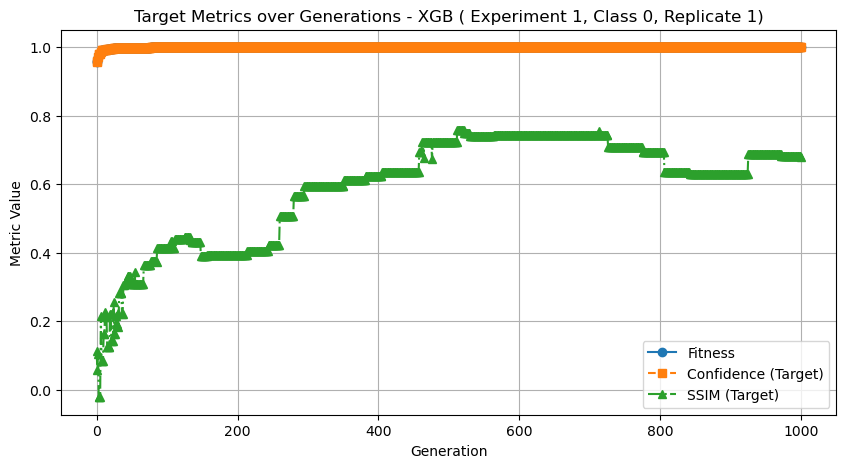

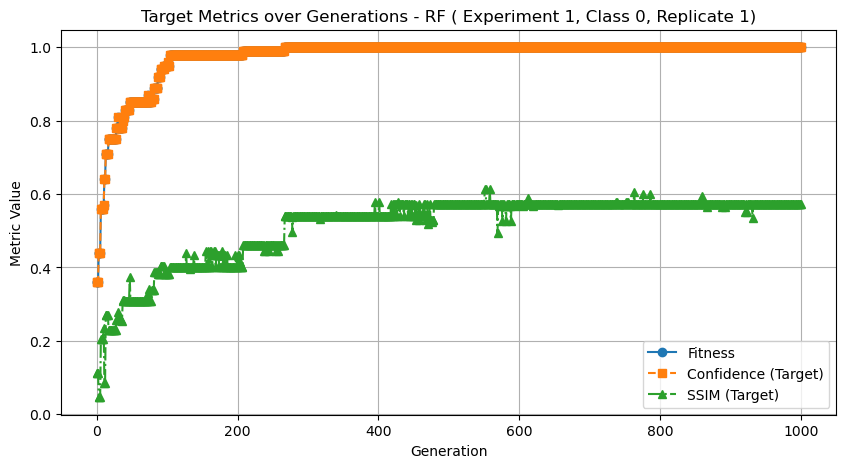

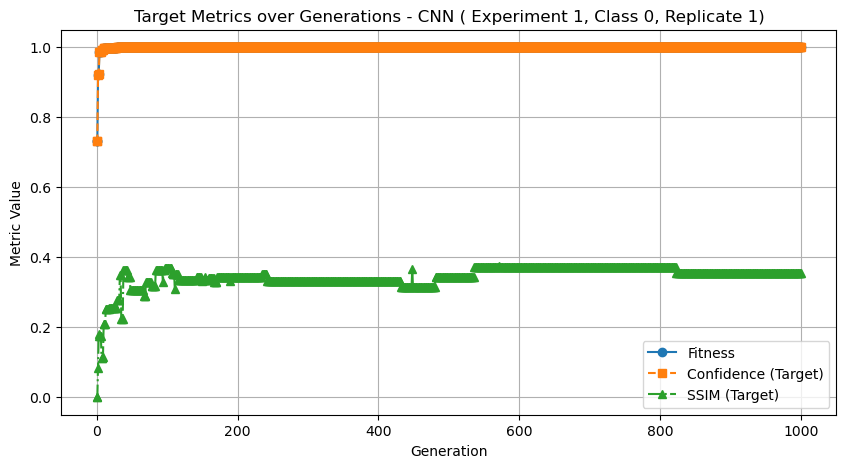

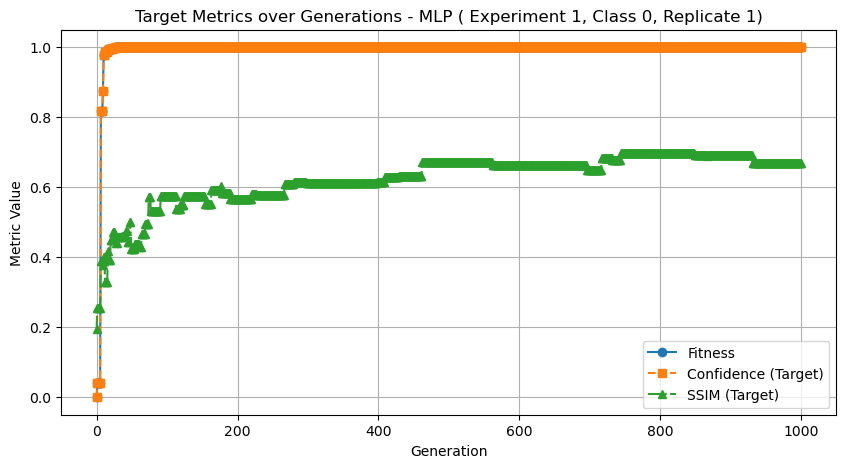

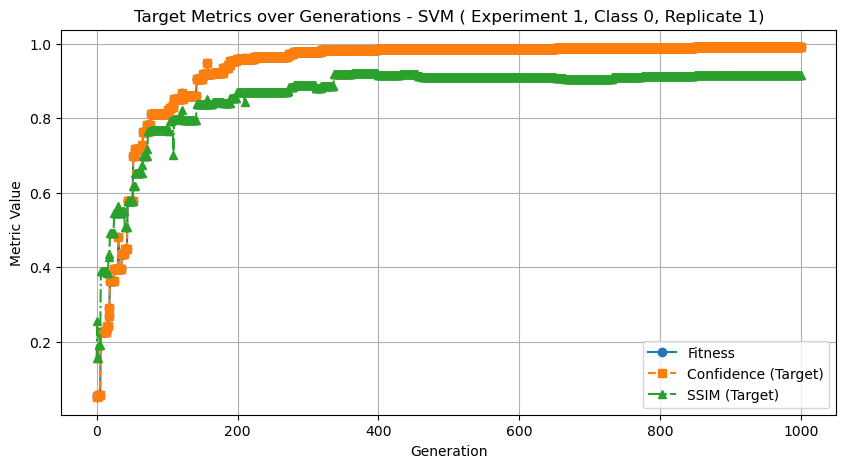

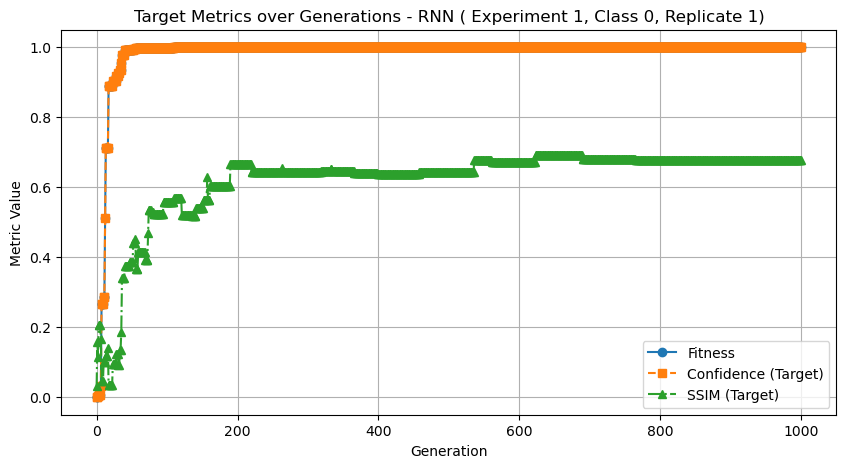

In [9]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def check_csv_files(base_dir, experiments, datasets):
    """
    Check the presence of CSV files and extract the last entry in the 'Generation' column.

    Args:
        base_dir (str): Base directory where data is stored.
        experiments (list): List of experiment names.
        datasets (list): List of dataset names.

    Returns:
        None
    """
    all_files_present = True
    csv_data = {}

    for experiment in experiments:
        for dataset in datasets:
            experiment_path = os.path.join(base_dir, experiment, dataset)
            if not os.path.exists(experiment_path):
                print(f"Path does not exist: {experiment_path}")
                all_files_present = False
                continue

            models = [m for m in os.listdir(experiment_path) if os.path.isdir(os.path.join(experiment_path, m))]

            for model in models:
                model_path = os.path.join(experiment_path, model)
                class_path = os.path.join(model_path, "class_0")
                replicate_path = os.path.join(class_path, "replicate_1")

                if not os.path.exists(replicate_path):
                    print(f"Path does not exist: {replicate_path}")
                    all_files_present = False
                    continue

                csv_files = [f for f in os.listdir(replicate_path) if f.endswith('.csv')]

                for csv_file in csv_files:
                    csv_path = os.path.join(replicate_path, csv_file)
                    df = pd.read_csv(csv_path)

                    if 'Generation' in df.columns:
                        last_generation = df['Generation'].iloc[-1]
                        print(f"Job finished. Ended at Generation: {last_generation} in {csv_path}")

                        # Store data for plotting
                        if model not in csv_data:
                            csv_data[model] = df[df["Generation"] <= 1000][["Generation", "Fitness", "Confidence (Target Class)", "SSIM (Target Class)"]]

                    all_files_present = False

    if all_files_present:
        print("All jobs ran till final generation")
    else:
        print("Not all jobs ran till final generation")

    return csv_data


def plot_metrics_separate(csv_data):
    """
    Plot target metrics against generations for each model separately.

    Args:
        csv_data (dict): Dictionary with model names as keys and DataFrame as values.

    Returns:
        None
    """
    for model, df in csv_data.items():
        plt.figure(figsize=(10, 5))
        plt.plot(df["Generation"], df["Fitness"], label="Fitness", linestyle='-', marker='o')
        plt.plot(df["Generation"], df["Confidence (Target Class)"], label="Confidence (Target)", linestyle='--', marker='s')
        plt.plot(df["Generation"], df["SSIM (Target Class)"], label="SSIM (Target)", linestyle='-.', marker='^')

        plt.xlabel("Generation")
        plt.ylabel("Metric Value")
        plt.title(f"Target Metrics over Generations - {model} ( Experiment 1, Class 0, Replicate 1)")
        plt.legend()
        plt.grid(True)
        plt.show()



# Base directory and parameters
base_dir = "/media/ankit-gupta/546B-6466/data_generated"
experiments = ["Exp_1"]
datasets = ["sklearnDigits"]

# Run the file checking script and get data for plotting
csv_data = check_csv_files(base_dir, experiments, datasets)

# Plot the metrics
if csv_data:
    plot_metrics_separate(csv_data)
